In [102]:
from numpy import exp, std, mean, sqrt
from scipy.stats import uniform
from scipy import integrate
import matplotlib.pyplot as plt

In [79]:
def MC1(x,y):
    u_val = uniform.rvs(0,1, size = y)
    u_val = [exp(u_val[i]) for i in range(len(u_val))]
    return sum(u_val)/len(u_val)

def MC2(x,y):
    c_star = -6*(3-exp(1))
    u_val = uniform.rvs(0,1, size = y)
    u_val = [exp(u_val[i])+c_star*(u_val[i]-0.5) for i in range(len(u_val))]
    return sum(u_val)/len(u_val)

def I(x):
    return integrate.quad(lambda t: exp(t), 0, x)[0]

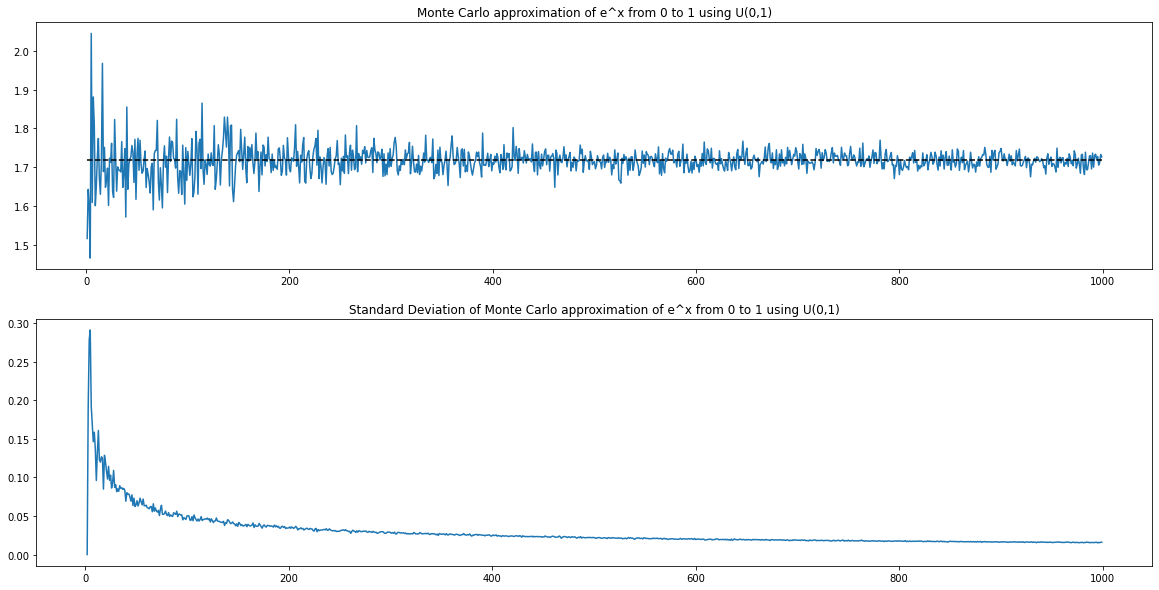

In [85]:
plt.figure(figsize=(20,10))
n_vals = [i for i in range(1,1000)]
plt.subplot(2,1,1)
plt.plot(n_vals, [MC1(1, n_vals[j]) for j in range(len(n_vals))])
plt.plot(n_vals, [I(1) for i in range(len(n_vals))], c = "black", ls = "--")
plt.title("Monte Carlo approximation of e^x from 0 to 1 using U(0,1)")
plt.subplot(2,1,2)
plt.plot(n_vals, [std(exp(uniform.rvs(0,1, size = j)))/sqrt(j) for j in range(len(n_vals))])
plt.title("Standard Deviation of Monte Carlo approximation of e^x from 0 to 1 using U(0,1)")
plt.show()

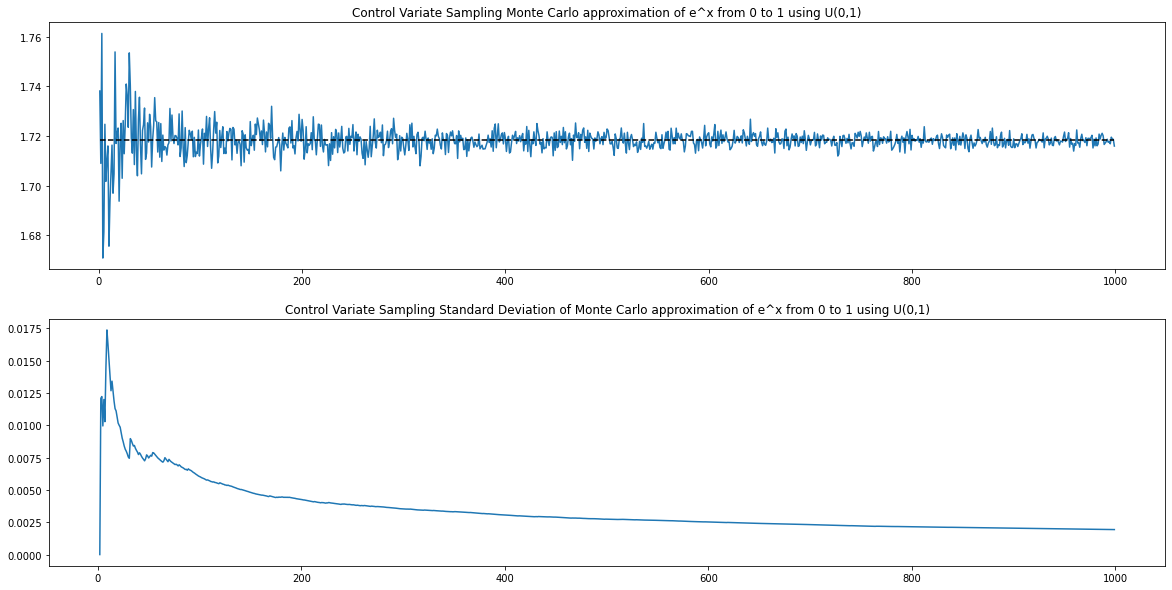

In [81]:
plt.figure(figsize=(20,10))
n_vals = [i for i in range(1,1000)]
plt.subplot(2,1,1)
plt.plot(n_vals, [MC2(1, n_vals[j]) for j in range(len(n_vals))])
plt.plot(n_vals, [I(1) for i in range(len(n_vals))], c = "black", ls = "--")
plt.title("Control Variate Sampling Monte Carlo approximation of e^x from 0 to 1 using U(0,1)")
plt.subplot(2,1,2)
plt.plot(n_vals, [std(exp(uniform.rvs(0,1, size = j, random_state=69))+c_star*(uniform.rvs(0,1, size = j, random_state = 69)-0.5))/sqrt(j) for j in range(len(n_vals))])
plt.title("Control Variate Sampling Standard Deviation of Monte Carlo approximation of e^x from 0 to 1 using U(0,1)")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6680\3757628300.py:4: RuntimeWarning: invalid value encountered in double_scalars
  [(std(exp(uniform.rvs(0,1, size = j, random_state = 69))) -


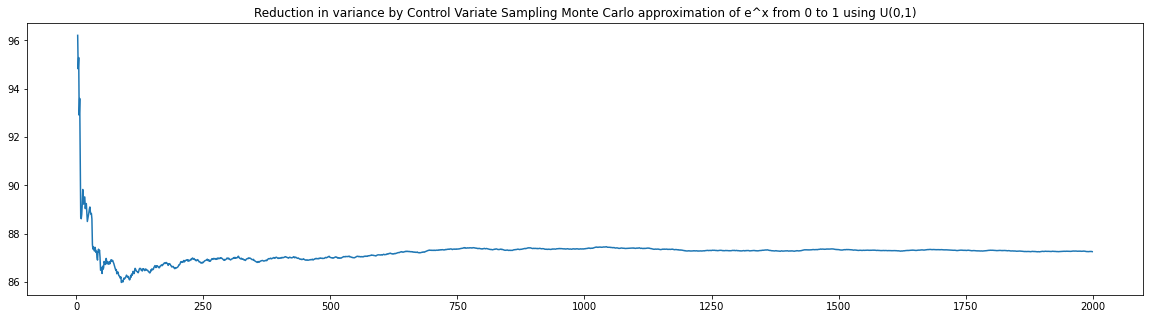

In [96]:
plt.figure(figsize=(20,5))
n_vals = [i for i in range(1,2000)]
plt.plot(n_vals,
[(std(exp(uniform.rvs(0,1, size = j, random_state = 69))) -
 std(exp(uniform.rvs(0,1, size = j, random_state = 69))+c_star*(uniform.rvs(0,1, size = j, random_state = 69)-0.5)))*100/
 std(exp(uniform.rvs(0,1, size = j, random_state = 69))) for j in range(len(n_vals))])
plt.title("Reduction in variance by Control Variate Sampling Monte Carlo approximation of e^x from 0 to 1 using U(0,1)")
plt.show()